In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RB
#from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE as SM
from sklearn.ensemble import RandomForestRegressor as RF,GradientBoostingRegressor as GB,ExtraTreesClassifier as ET
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neural_network import MLPClassifier as MP

In [2]:
df=pd.read_csv('data.csv')

In [3]:
#df1=df[df["FLAG"]==0]

In [4]:
#df1=df
df.head()

CONS_NO  FLAG  2014/1/1  2014/1/10  2014/1/11  \
0  0387DD8A07E07FDA6271170F86AD9151     1       NaN        NaN        NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1       NaN        NaN        NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1       NaN        NaN        NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1       NaN        NaN        NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1       2.9       3.42       3.81   

   2014/1/12  2014/1/13  2014/1/14  2014/1/15  2014/1/16    ...     2016/9/28  \
0        NaN        NaN        NaN        NaN        NaN    ...         10.12   
1        NaN        NaN        NaN        NaN        NaN    ...          0.00   
2        NaN        NaN        NaN        NaN        NaN    ...           NaN   
3        NaN        NaN        NaN        NaN        NaN    ...          6.50   
4       4.58       3.56       4.25       3.86       3.53    ...         17.77   

   2016/9/29  2016/9/3  2016/9/30  2016/9/4  2016/9/5  2016/9/6  2016/9/7  \
0       9.96     16.92       7.60     27.22     18.05     26.47     18.75   
1       0.00      0.00       0.00      0.00      0.00      0.00      0.00   
2        NaN       NaN        NaN       NaN       NaN       NaN       NaN   
3       9.99     11.78      18.59     26.80     18.57     14.59     12.82   
4      10.37     15.32      13.51     12.23     14.68     16.35     18.14   

   2016/9/8  2016/9/9  
0     17.84     14.92  
1      0.00      0.00  
2       NaN       NaN  
3     19.37     15.92  
4     18.41     17.31  

[5 rows x 1036 columns]

In [5]:
math.isnan(df.iloc[0][2])

True

In [7]:
#df1.shape

In [8]:
#df.head(

In [9]:
#df1.isnull().sum()
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)

In [10]:
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
#dates.sort()
fdates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [11]:
fdates.insert(0,"FLAG")
fdates.insert(0,"CONS_NO")

In [12]:
df.columns=fdates

In [13]:
import datetime
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [14]:
cols=df.columns.tolist()[0:2]+sorteddates
df=df[cols]

In [15]:
df

CONS_NO  FLAG  2014/01/01  2014/01/02  \
0      0387DD8A07E07FDA6271170F86AD9151     1         NaN         NaN   
1      01D6177B5D4FFE0CABA9EF17DAFC2B84     1         NaN         NaN   
2      4B75AC4F2D8434CFF62DB64D0BB43103     1         NaN         NaN   
3      B32AC8CC6D5D805AC053557AB05F5343     1         NaN         NaN   
4      EDFC78B07BA2908B3395C4EB2304665E     1        2.90        5.64   
5      6BCFD78138BC72A9BA1BFB0B79382192     1         NaN         NaN   
6      34C1954AA3703C4F8BD8EAEA7C4B7B83     1        0.11        0.11   
7      768309B0EB11FD436CEE5ABFB84F4C0C     1        0.91        1.16   
8      D0A186208CE83FBCCF730857C9A75B6F     1         NaN         NaN   
9      516954F5FF177CE314656D727FCC66A5     1       11.02        7.92   
10     C7952FEE130E744EC8CAA7490F72D3F4     1         NaN         NaN   
11     E34D1B467A365835A4A8AAD9395D49AA     1         NaN         NaN   
12     9F61C13255D1183B179753742A24BFAD     1        1.91        2.11   
13     F1D26619E4BC428924BAF5261F705D18     1        5.20        2.35   
14     EB2DCE9143BF42A1C7E5E218BB77B6A6     1        0.00        0.00   
15     E89F2AD4B103F2E2045EE0F4E60429BC     1        6.03        3.18   
16     441D4A577AAD02F6C003644640C2619C     1       19.92       14.81   
17     A9601F29D6AE4544F52BD5CB56426E3F     1        9.52        9.36   
18     93D2F9BC41BF6CAF05D11345D58C383A     1         NaN         NaN   
19     369006719ADC2204345D5A156D19821D     1        0.02        0.02   
20     720FAD7A2EA8095703804E9C897F159E     1        6.60        5.64   
21     CFA8145DAF03AEC0B30D415E81F95937     1       32.31       26.91   
22     5C897FDAC2DB3B33B1EC83273F5F08C7     1       98.52       95.90   
23     78AA6CB5B9C2AF38C3C0707C82834FB5     1        0.40        0.35   
24     BC0A840A5A34E044B9920F557D9A2111     1       29.90       55.78   
25     51EAAC77A3247A422C4BF350D645EB88     1       34.28       15.08   
26     D9C351E2175E2A50A7B699080D895D32     1        6.59        6.48   
27     29682C581F0A0D250A15299ED45ABAAB     1         NaN         NaN   
28     1AB6DF6673AF0D809B3FA523C1E7B2D0     1        6.76        6.73   
29     CC729BD06C7E8086E700CCCDDDC6D1AA     1         NaN         NaN   
...                                 ...   ...         ...         ...   
42342  F4F0ACED2387B73E146C52902DC771E0     0        0.22        0.71   
42343  3C9D5B7E35623D71F9ADBFA180F3CB53     0        0.02        0.05   
42344  6184C91D100CF2088FB745E71B29749F     0        0.00       10.90   
42345  7E5D73294385E8535476FB70BEAA8109     0         NaN         NaN   
42346  625A698D79D5E0C0B4F00A3C62935FC4     0       18.31       18.78   
42347  A1F462FB10242DBB617F010C6134CC3F     0         NaN         NaN   
42348  DE3E741F37CF88B5DE807C8DAF765DFC     0         NaN         NaN   
42349  B7CB88E84879595E662D349EBF3B135E     0         NaN         NaN   
42350  516F87A7FCD11AEA145C60A01E4609DD     0         NaN         NaN   
42351  AE741828353F3248B0527D5C62D187AD     0       23.26       24.57   
42352  E9092A3295A4889D15BB18291A73D994     0         NaN         NaN   
42353  164CCE188B534C36646FE48747A491DA     0       33.50       62.50   
42354  7AF6DD70DBFF63B39EDC3EA763283DA6     0        0.00        0.00   
42355  8F792D080365FBD67B3603993DE92FA9     0       36.35        6.72   
42356  D7107BF367DB99704B2228A095902CDF     0       21.23       11.34   
42357  78BA4DCEF9288241813B1776EF0E9067     0        2.03        2.82   
42358  6206A75B194371D37C3872AB6B890627     0        0.90        2.07   
42359  C19D938140E1E51BF3DC9CA33378361B     0        0.00        0.00   
42360  61296C37BD3CF888FD2C08A4FAF1E090     0         NaN         NaN   
42361  2A32029199A137504FB925D214AF20E9     0         NaN         NaN   
42362  1C6A4E84B6CE1105A01EECC4955FE4AC     0         NaN         NaN   
42363  9B3DC5E19AC7BE97FBE1A65F4A115CC4     0      148.40      159.86   
42364  1DF750822A991C356E86556CF5A64955     0        0.00        0.00   
42365  8C864A692C

In [16]:
#df=df[cols]
df1=df

In [17]:
l=df["2014/01/01"]
l1=df["2014/01/02"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()

In [18]:
l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df1["2014/01/01"]=l2

In [19]:
df1.head()

CONS_NO  FLAG  2014/01/01  2014/01/02  2014/01/03  \
0  0387DD8A07E07FDA6271170F86AD9151     1         0.0         NaN         NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1         0.0         NaN         NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1         0.0         NaN         NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1         0.0         NaN         NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1         2.9        5.64        6.99   

   2014/01/04  2014/01/05  2014/01/06  2014/01/07  2014/01/08     ...      \
0         NaN         NaN         NaN         NaN         NaN     ...       
1         NaN         NaN         NaN         NaN         NaN     ...       
2         NaN         NaN         NaN         NaN         NaN     ...       
3         NaN         NaN         NaN         NaN         NaN     ...       
4        3.32        3.61        5.35        4.73        3.68     ...       

   2016/10/22  2016/10/23  2016/10/24  2016/10/25  2016/10/26  2016/10/27  \
0        7.18        8.07        8.09        9.53        5.48        8.75   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2       10.95       17.95       17.83       17.31       21.44       19.09   
3       12.81       15.12       17.26       14.91       19.59       20.79   
4       14.21       10.22        8.47        6.11        6.10        6.73   

   2016/10/28  2016/10/29  2016/10/30  2016/10/31  
0        9.30        7.54        9.16        6.74  
1        0.00        0.00        0.00        0.00  
2       18.56       16.25       14.20       13.66  
3       17.95       19.26       14.46       11.72  
4        7.52       10.89        9.86        8.72  

[5 rows x 1036 columns]

In [20]:
df.columns[-1],df.columns[-2]

('2016/10/31', '2016/10/30')

In [21]:
df.iloc[0][1035]

6.74

In [22]:
l=df["2016/10/31"]
l1=df["2016/10/30"]
l=np.asarray(l).tolist()
l1=np.asarray(l1).tolist()

In [23]:
l2=[]
for i in range(len(l)):
    if math.isnan(l[i]):
        if math.isnan(l1[i]):
            l2.append(0)
        else:
            l2.append(l1[i]/2)
    else:
        l2.append(l[i])
df1["2016/10/31"]=l2

In [24]:
df1.head()

CONS_NO  FLAG  2014/01/01  2014/01/02  2014/01/03  \
0  0387DD8A07E07FDA6271170F86AD9151     1         0.0         NaN         NaN   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1         0.0         NaN         NaN   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1         0.0         NaN         NaN   
3  B32AC8CC6D5D805AC053557AB05F5343     1         0.0         NaN         NaN   
4  EDFC78B07BA2908B3395C4EB2304665E     1         2.9        5.64        6.99   

   2014/01/04  2014/01/05  2014/01/06  2014/01/07  2014/01/08     ...      \
0         NaN         NaN         NaN         NaN         NaN     ...       
1         NaN         NaN         NaN         NaN         NaN     ...       
2         NaN         NaN         NaN         NaN         NaN     ...       
3         NaN         NaN         NaN         NaN         NaN     ...       
4        3.32        3.61        5.35        4.73        3.68     ...       

   2016/10/22  2016/10/23  2016/10/24  2016/10/25  2016/10/26  2016/10/27  \
0        7.18        8.07        8.09        9.53        5.48        8.75   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2       10.95       17.95       17.83       17.31       21.44       19.09   
3       12.81       15.12       17.26       14.91       19.59       20.79   
4       14.21       10.22        8.47        6.11        6.10        6.73   

   2016/10/28  2016/10/29  2016/10/30  2016/10/31  
0        9.30        7.54        9.16        6.74  
1        0.00        0.00        0.00        0.00  
2       18.56       16.25       14.20       13.66  
3       17.95       19.26       14.46       11.72  
4        7.52       10.89        9.86        8.72  

[5 rows x 1036 columns]

In [25]:
#for i in range(42372):
#    l=np.asarray(df1[i:i+1]).tolist()[0]
#    l1=[]
#    l1[0:3]=l[0:3]
#    for j in range(3,1035):
#        if math.isnan(l[j]):
#            if math.isnan(l[j+1])==False and math.isnan(l[j-1])==False:
#                l1.append((l[j-1]+l[j+1])/2)
#            else:
#                l1.append(0)
#        else:
#            l1.append(l[j])
#    l1.append(l[-1])
#   df1[i:i+1]=l1

In [26]:
df.columns

Index(['CONS_NO', 'FLAG', '2014/01/01', '2014/01/02', '2014/01/03',
       '2014/01/04', '2014/01/05', '2014/01/06', '2014/01/07', '2014/01/08',
       ...
       '2016/10/22', '2016/10/23', '2016/10/24', '2016/10/25', '2016/10/26',
       '2016/10/27', '2016/10/28', '2016/10/29', '2016/10/30', '2016/10/31'],
      dtype='object', length=1036)

In [142]:
#df1.isnull().sum()
l=df.columns
la=['CONS_NO','FLAG']
lbx=[]
for i in l:
    if i not in la:
        lbx.append(i)

In [28]:
lb

['2014/01/01',
 '2014/01/02',
 '2014/01/03',
 '2014/01/04',
 '2014/01/05',
 '2014/01/06',
 '2014/01/07',
 '2014/01/08',
 '2014/01/09',
 '2014/01/10',
 '2014/01/11',
 '2014/01/12',
 '2014/01/13',
 '2014/01/14',
 '2014/01/15',
 '2014/01/16',
 '2014/01/17',
 '2014/01/18',
 '2014/01/19',
 '2014/01/20',
 '2014/01/21',
 '2014/01/22',
 '2014/01/23',
 '2014/01/24',
 '2014/01/25',
 '2014/01/26',
 '2014/01/27',
 '2014/01/28',
 '2014/01/29',
 '2014/01/30',
 '2014/01/31',
 '2014/02/01',
 '2014/02/02',
 '2014/02/03',
 '2014/02/04',
 '2014/02/05',
 '2014/02/06',
 '2014/02/07',
 '2014/02/08',
 '2014/02/09',
 '2014/02/10',
 '2014/02/11',
 '2014/02/12',
 '2014/02/13',
 '2014/02/14',
 '2014/02/15',
 '2014/02/16',
 '2014/02/17',
 '2014/02/18',
 '2014/02/19',
 '2014/02/20',
 '2014/02/21',
 '2014/02/22',
 '2014/02/23',
 '2014/02/24',
 '2014/02/25',
 '2014/02/26',
 '2014/02/27',
 '2014/02/28',
 '2014/03/01',
 '2014/03/02',
 '2014/03/03',
 '2014/03/04',
 '2014/03/05',
 '2014/03/06',
 '2014/03/07',
 '2014/03/

In [29]:
for i in range(1,len(lb)-1):
    l=np.asarray(df[lb[i]]).tolist()
    l1=np.asarray(df[lb[i-1]]).tolist()
    l2=np.asarray(df[lb[i+1]]).tolist()
    l3=[]
    for j in range(len(l)):
        if math.isnan(l[j]):
            if math.isnan(l1[j])==False and math.isnan(l2[j])==False:
                l3.append((l1[j]+l2[j])/2)
            else:
                l3.append(0)
        else:
            l3.append(l[j])
    df1[lb[i]]=l3

In [30]:
df1.head()

CONS_NO  FLAG  2014/01/01  2014/01/02  2014/01/03  \
0  0387DD8A07E07FDA6271170F86AD9151     1         0.0        0.00        0.00   
1  01D6177B5D4FFE0CABA9EF17DAFC2B84     1         0.0        0.00        0.00   
2  4B75AC4F2D8434CFF62DB64D0BB43103     1         0.0        0.00        0.00   
3  B32AC8CC6D5D805AC053557AB05F5343     1         0.0        0.00        0.00   
4  EDFC78B07BA2908B3395C4EB2304665E     1         2.9        5.64        6.99   

   2014/01/04  2014/01/05  2014/01/06  2014/01/07  2014/01/08     ...      \
0        0.00        0.00        0.00        0.00        0.00     ...       
1        0.00        0.00        0.00        0.00        0.00     ...       
2        0.00        0.00        0.00        0.00        0.00     ...       
3        0.00        0.00        0.00        0.00        0.00     ...       
4        3.32        3.61        5.35        4.73        3.68     ...       

   2016/10/22  2016/10/23  2016/10/24  2016/10/25  2016/10/26  2016/10/27  \
0        7.18        8.07        8.09        9.53        5.48        8.75   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2       10.95       17.95       17.83       17.31       21.44       19.09   
3       12.81       15.12       17.26       14.91       19.59       20.79   
4       14.21       10.22        8.47        6.11        6.10        6.73   

   2016/10/28  2016/10/29  2016/10/30  2016/10/31  
0        9.30        7.54        9.16        6.74  
1        0.00        0.00        0.00        0.00  
2       18.56       16.25       14.20       13.66  
3       17.95       19.26       14.46       11.72  
4        7.52       10.89        9.86        8.72  

[5 rows x 1036 columns]

In [31]:
#plt.scatter(df["2014/1/14"],df["FLAG"])

In [130]:
#df.isnull().sum(axis=1)
#df1.iloc[4].value_counts()

In [138]:
df1.iloc[3800]["FLAG"]

0

In [143]:
l1=lbx[100:990]

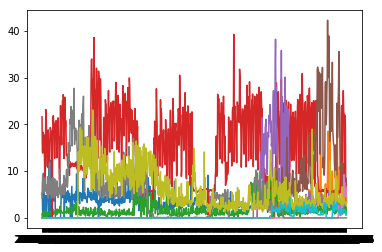

In [150]:
for i in range(5700,5710):
    plt.plot(l1,df1.iloc[i][l1])
    #plt.show()

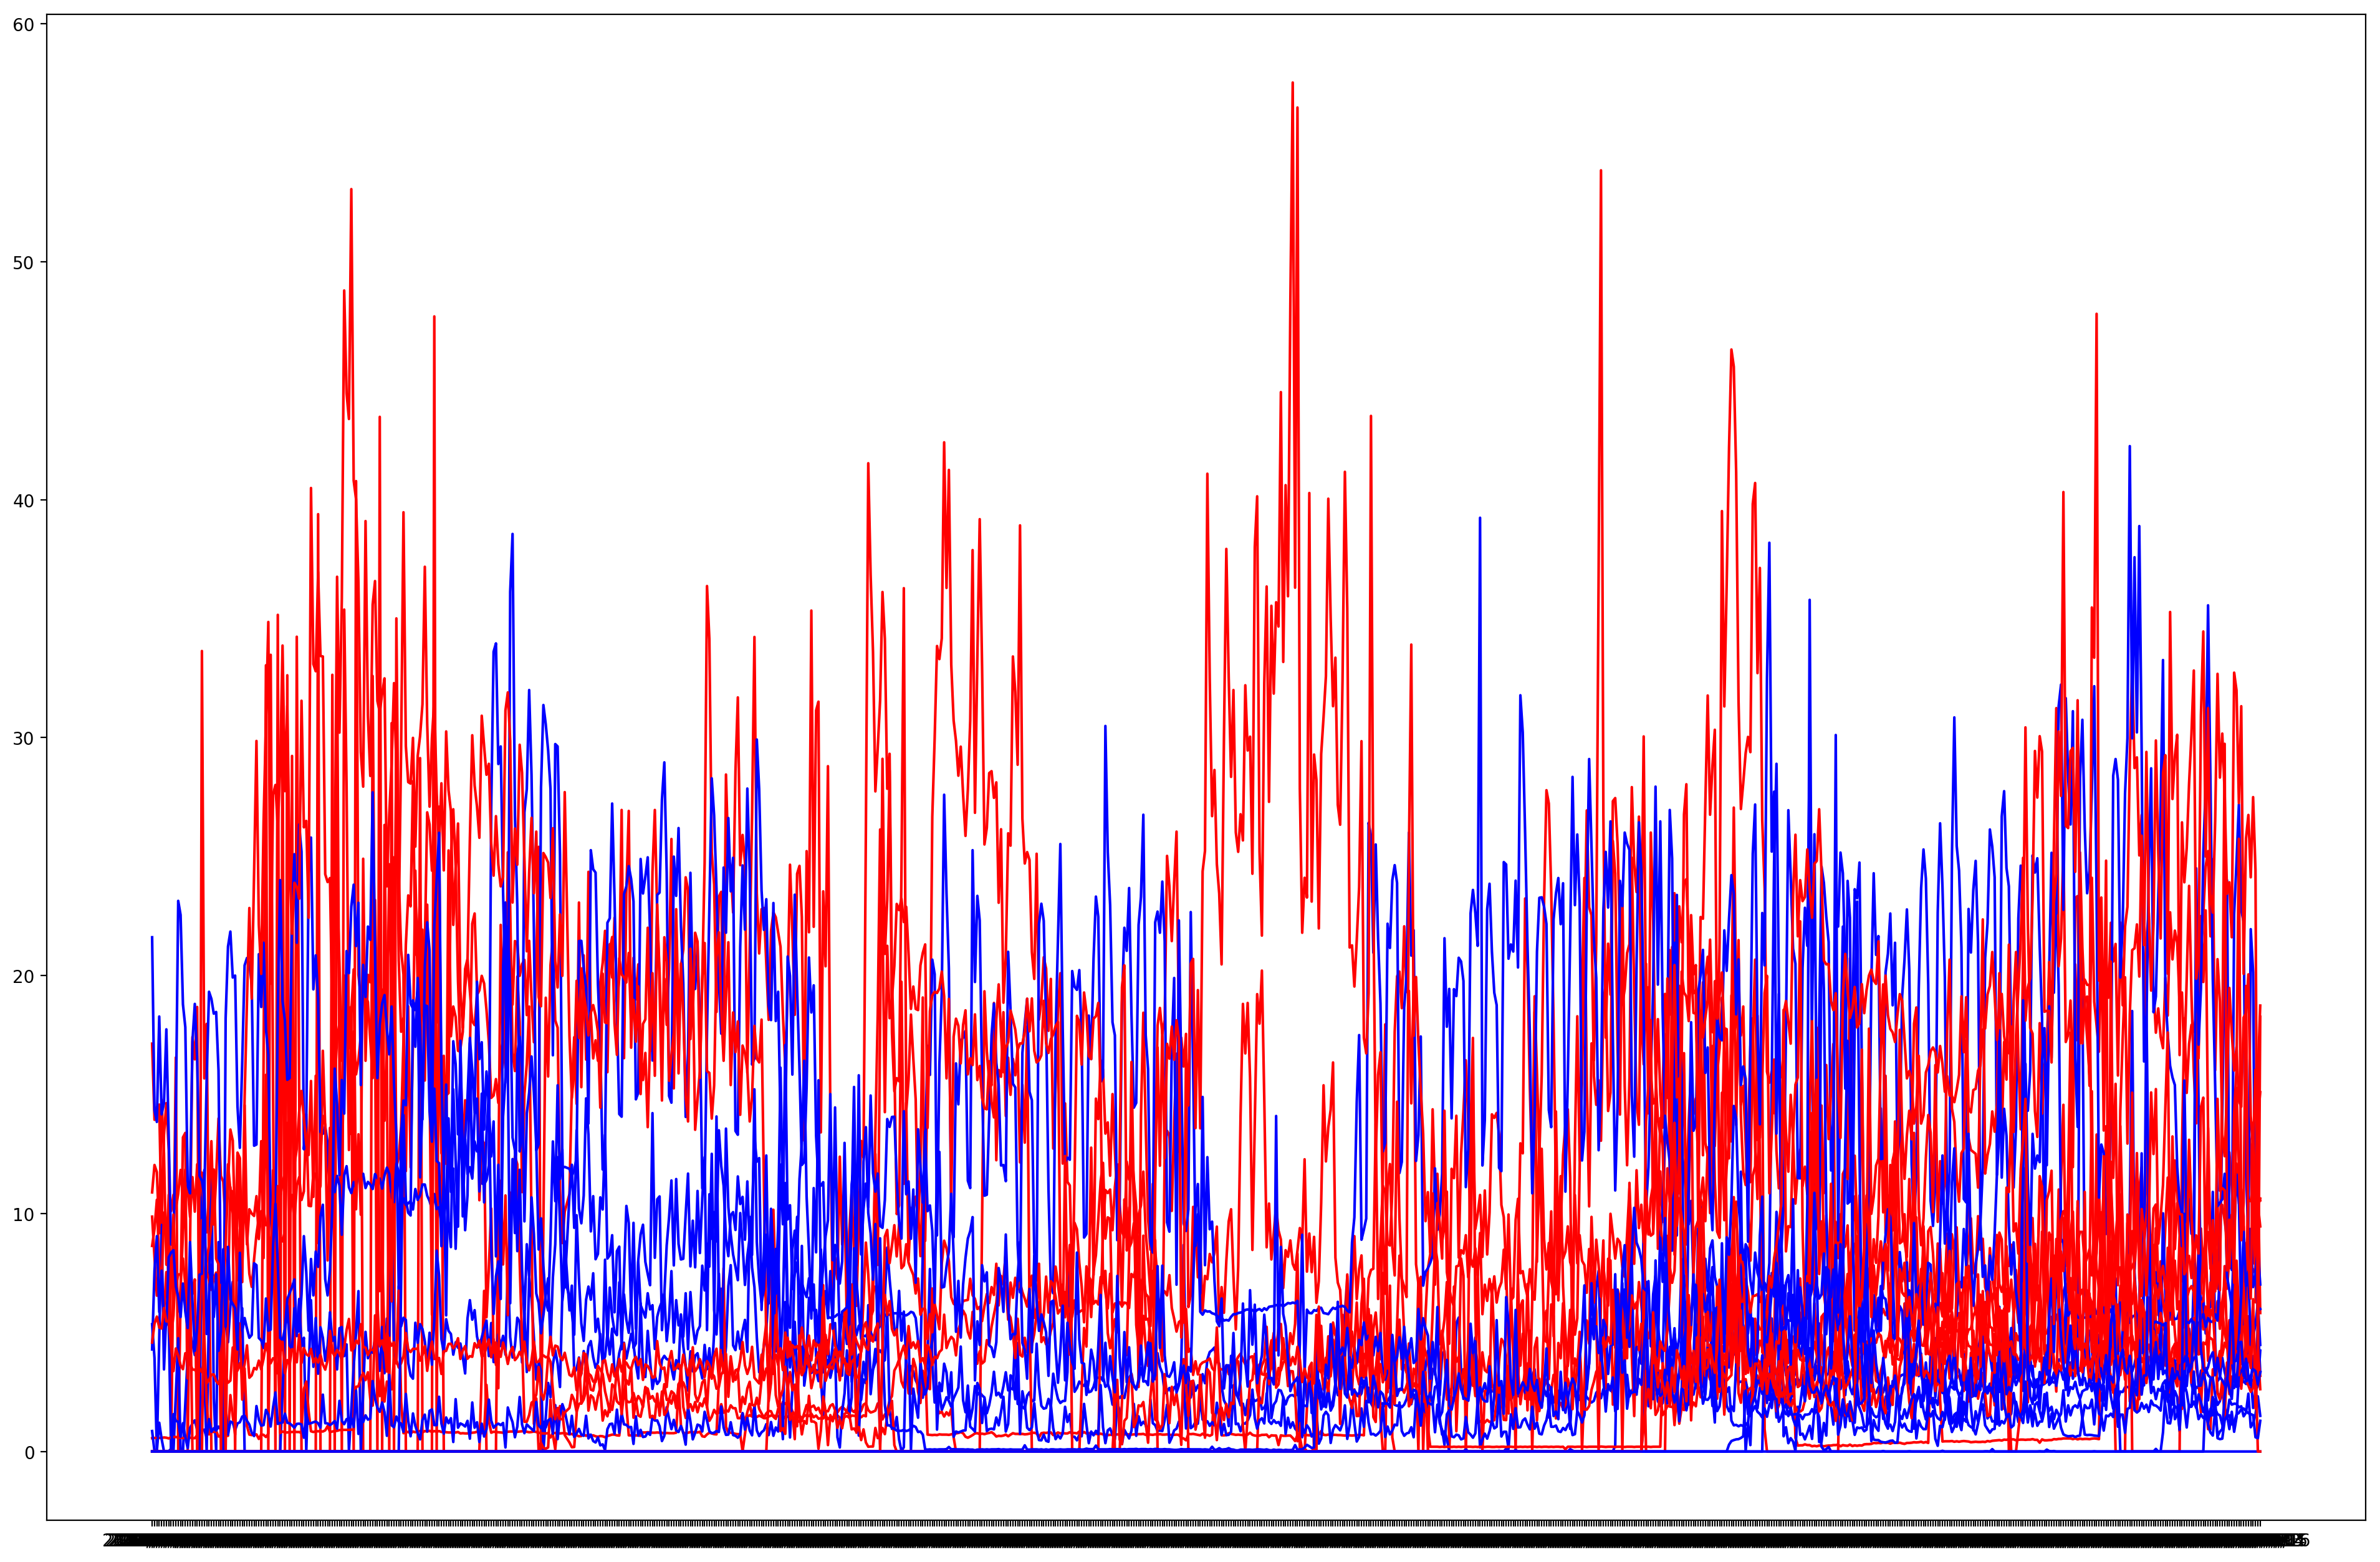

In [153]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(24,16), dpi=200, facecolor='w', edgecolor='k')
axes = plt.gca()
fig = plt.gcf()
#axes.set_xlim([,])
#x1,x2,y1,y2 = plt.axis()
#plt.axis((x1,x2,0,50))
#axes.set_ylim([0,50])
for i in range(1700,1710):
    plt.plot(l1,df1.iloc[i][l1],c='r')
    plt.plot(l1,df1.iloc[i+4000][l1],c='b')
    #plt.plot(l1,)
    #plt.show()
#fig.set_size_inches(18.5, 10.5)
fig.savefig('wihoutcluster.png', dpi=200)

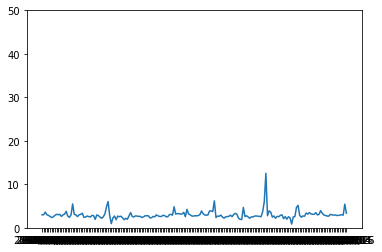

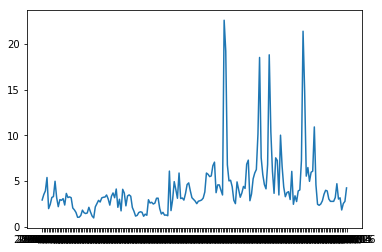

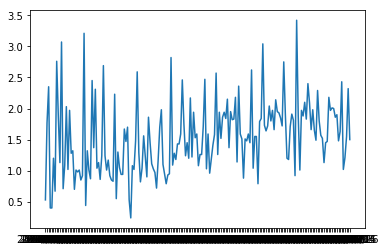

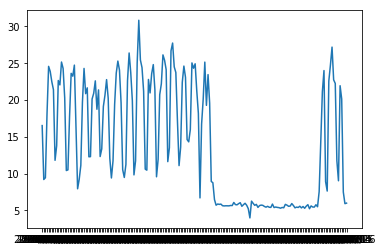

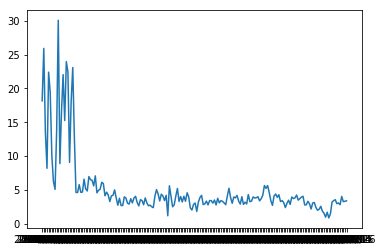

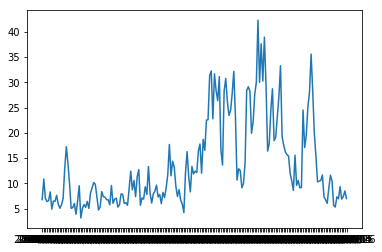

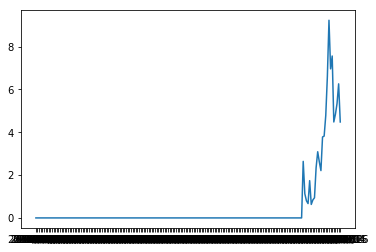

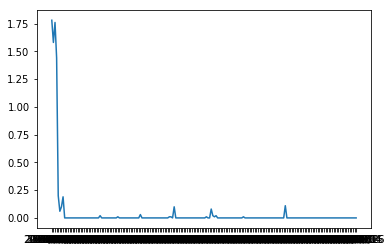

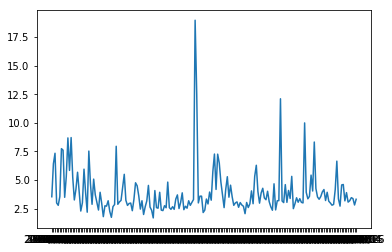

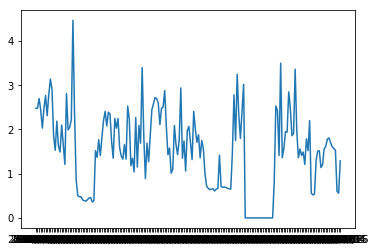

In [35]:
#4372,14,4919,4808,261 278 267 280 must
#major start from col 700 to last
#on whole a constancy should be maintained for not theft
axes = plt.gca()
#axes.set_xlim([,])
axes.set_ylim([0,50])
for i in range(5700,5710):
    plt.plot(l1,df1.iloc[i][l1])
    plt.show()

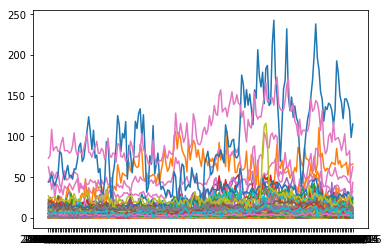

In [36]:
for i in range(250,300):
    plt.plot(l1,df1.iloc[i][l1])

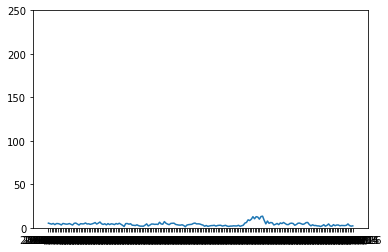

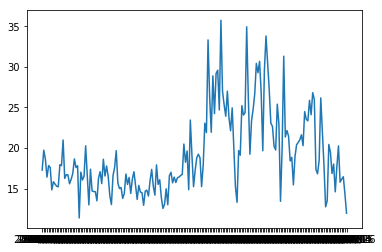

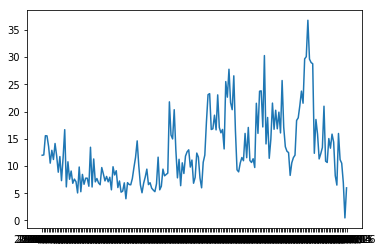

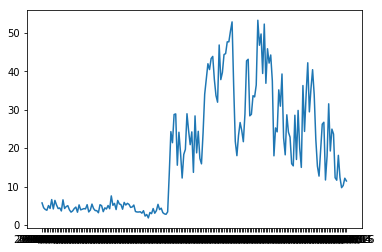

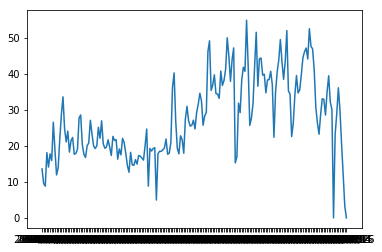

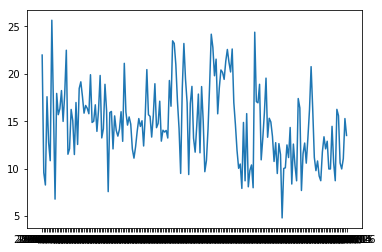

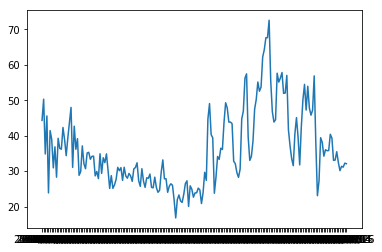

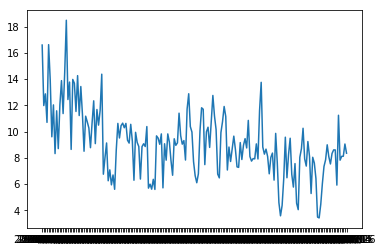

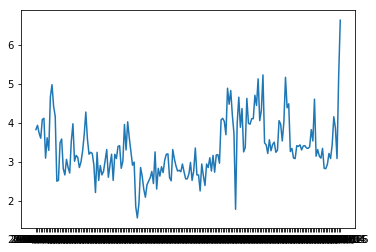

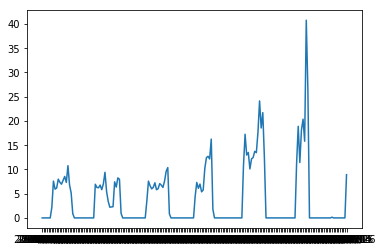

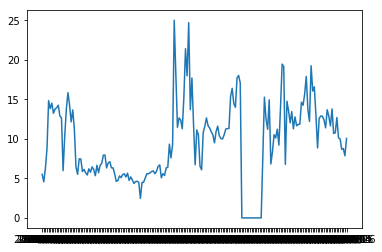

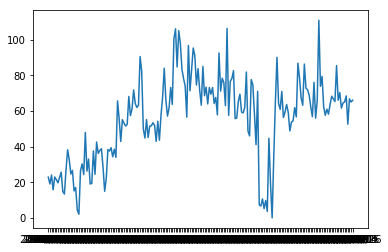

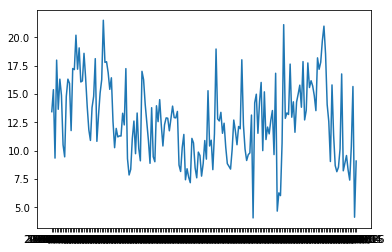

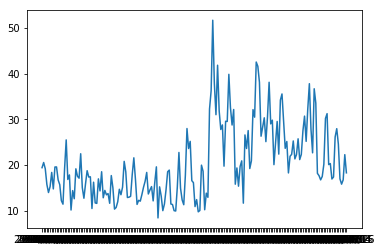

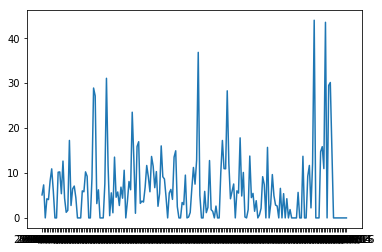

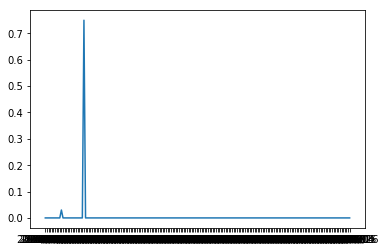

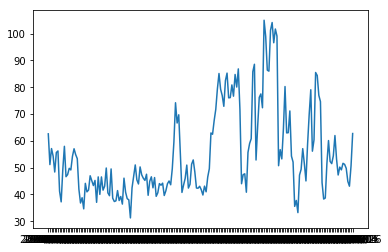

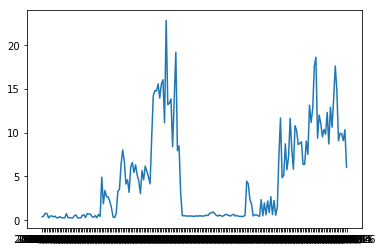

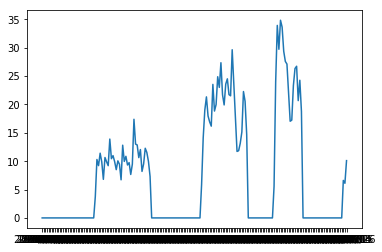

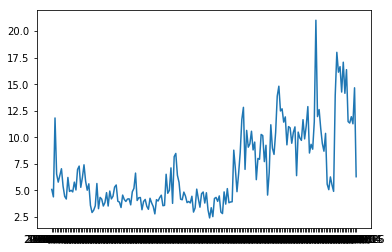

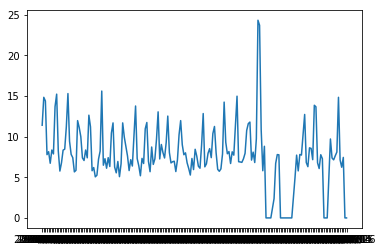

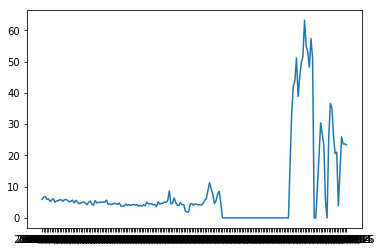

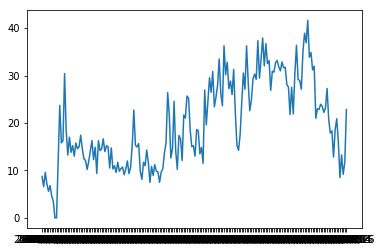

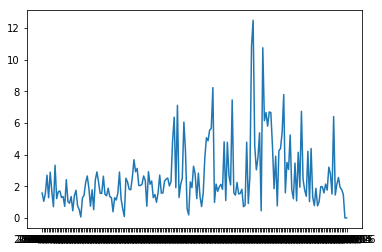

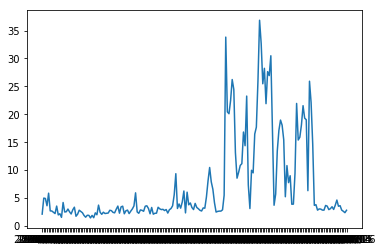

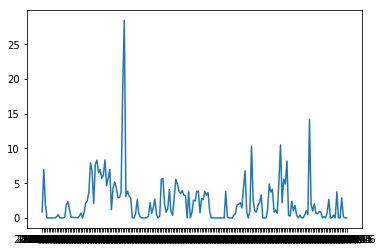

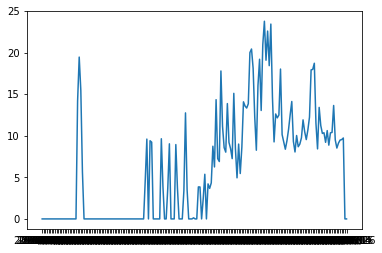

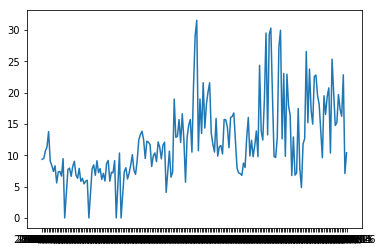

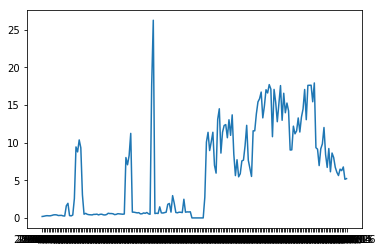

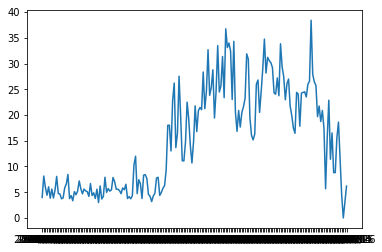

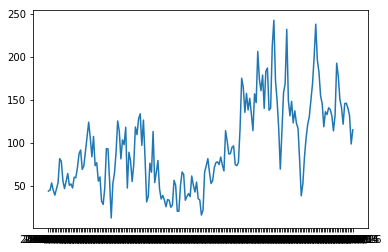

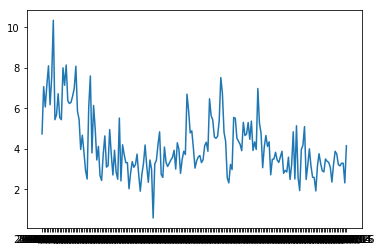

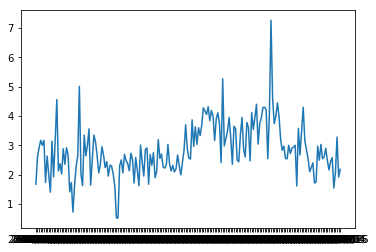

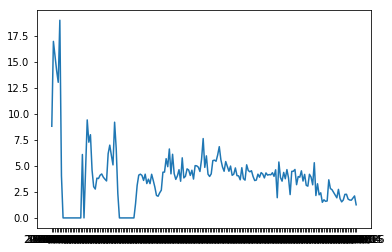

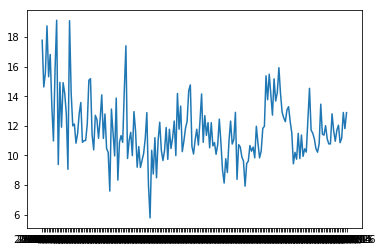

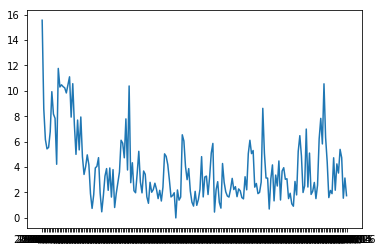

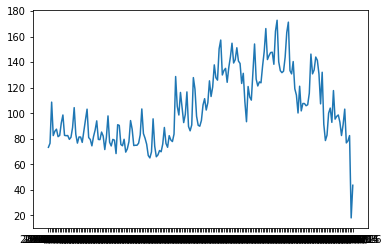

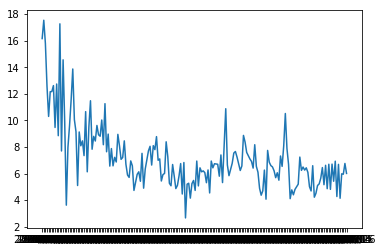

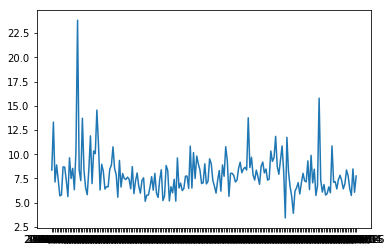

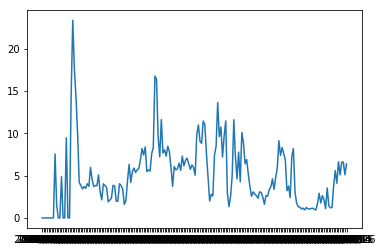

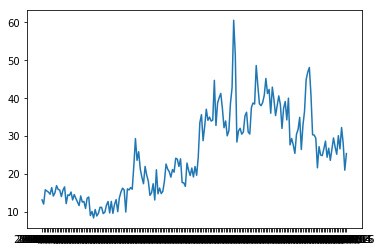

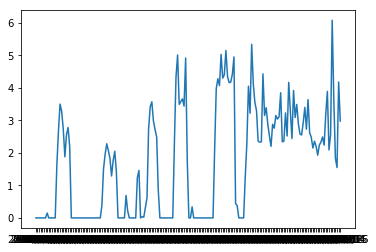

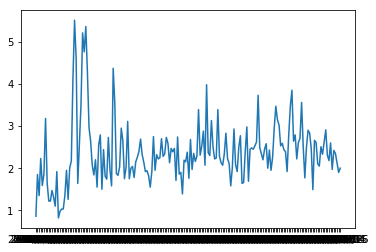

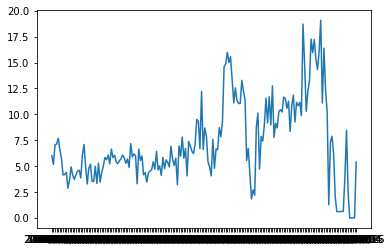

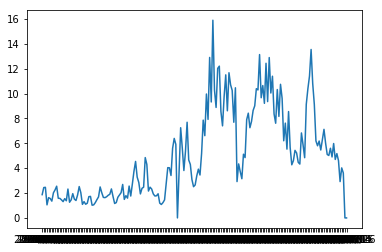

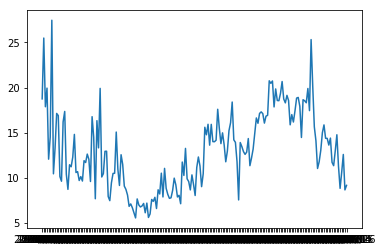

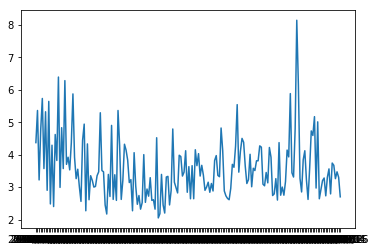

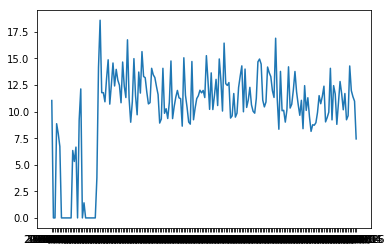

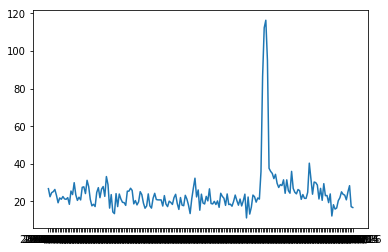

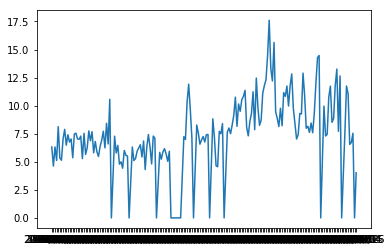

In [37]:
#c=0
#for i in l:
#    if(i<=70):
#        c+=1
#c
#df.iloc[4372].isnull().sum()
axes = plt.gca()
axes.set_ylim([0,250])
for i in range(250,300):
    plt.plot(l1,df1.iloc[i][l1])
    plt.show()

In [38]:


#df.isnull().sum(axis=1)
#may be theft in a period of time not always

In [39]:
#l1=[]
#for i in range(1000):
#    l=np.asarray(df1.iloc[i][lb]).tolist()
#    x=statistics.stdev(l)
#    y=statistics.mean(l)
#    l1.append(y+2*x)
    #df1.iloc[i][lb].apply(lambda t:y+2*x if t>y+2*x else t)

In [40]:
#df.iloc[1].isnull().sum()
#dfw=df[df["means"]>=1]
#l=df.columns.tolist()
#l[970]

In [41]:
#df1.iloc[1].describe()

In [42]:
#l=[df1.iloc[i].value_counts for i in range(42372)]
#df1.iloc[0].count(0)
#l=(df1==0).astype(int).sum(axis=1)

In [43]:
#l[250]

In [44]:
#df["means"]=df.mean(axis=1,skipna=True)
#la=df.mean(axis=1,skipna=True)
#l
#c=0
#for i in l:
#    if i<=15000:
#        c+=1
#c

In [180]:
#c=0
#for i in range(len(l)):
#    if l[i]<=200:
#        c+=1
#c
#df["mean"].shape
#df.fillna(df.means)

In [46]:
#for i in range(0,len(lb)):
#    l=np.asarray(df[lb[i]]).tolist()
    #l1=np.asarray(df[lb[i-1]]).tolist()
    #l2=np.asarray(df[lb[i+1]]).tolist()
#    l3=[]
#    for j in range(len(l)):
#        if math.isnan(l[j]):
#            l3.append(la[j])
#        else:
#            l3.append(l[j])
#    df[lb[i]]=l3

In [47]:
#df1["zero"]=l

In [48]:
#df2=df1[df1["zero"]<=400]

In [49]:
#df2["FLAG"].value_counts()

In [155]:
#len(X)
len(lbx)

1035

In [156]:
#l=np.asarray(df1.iloc[0][lb]).tolist()
#x=statistics.stdev(d)
#y=statistics.mean(l)
#d=df1.iloc[0][lb].apply(lambda t:y+2*x if t>y+2*x else t)
X=df1[lbx[500:]]
Y=df1["FLAG"]

In [160]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [161]:
sm=SM(random_state=42)
#X_tr,Y_tr=sm.fit_sample(X_train,Y_train)
X_tr,Y_tr=sm.fit_sample(X_train,Y_train)

In [162]:
#model=RB()
#model.fit(X_trainpca,Y_train)
model=ET(n_estimators=10)
model.fit(X_tr,Y_tr)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [163]:
model.score(X_test,Y_test)

0.8930973451327434

In [164]:
l1=model.predict(X_test)
f1_score(Y_test,l1)

0.22298456260720412

In [166]:
Y_test=Y_test.tolist()

In [170]:
c=0
for i in range(len(l1)):
    if(Y_test[i])==0:
        c+=1
c

7756

In [171]:
c=0
for i in range(len(l1)):
    if l1[i]!=Y_test[i] and Y_test[i]==0:
        c+=1
print(c)

317


In [53]:
#pca = PCA(n_components=50).fit(X)
clf=KMeans(n_clusters=10)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
#df.iloc[4919].isnull().sum()
#X_pca= pca.transform(X)
centroids=clf.cluster_centers_
labels=clf.labels_
colors=["g.","r.","c.","b.","k.","o."]

In [55]:
t=clf.predict(X)

In [56]:
t=t.tolist()

In [57]:
c=0
l=[]
for i in range(len(t)):
    if Y[i]==1:
        l.append(t[i])

In [58]:
c=0
for i in l:
    if i==0:
        c+=1
c

3371

In [60]:
df1["labels"]=labels

In [61]:
X["labels"]=labels

C:\Users\ANSHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
X1=X[X["labels"]==0]

In [63]:
X1=X1.drop(["labels"],axis=1)

In [64]:
l=[]
for i in range(41809):
    l.append(X1.iloc[i]) 

In [65]:
#c=0
#l1=[]
#for i in l:
#    for j in range(534):
#        c+=(i[j]-centroids[4][j])**2
#    c=np.sqrt(c)
#    l1.append(c)
#    c=0


In [66]:
t1=list((np.array(l) - np.array(centroids[0]))**2)

In [67]:
l2=[]
for i in t1:
    l2.append(np.sqrt(np.sum(i)))

In [68]:
mean=np.mean(l2)

In [69]:
Y1=Y[X["labels"]==0]

In [70]:
Y1=Y1.tolist()

In [71]:
c=0
l3=[]
for i in range(41809):
    if Y1[i]==1:
        l3.append(l2[i])

In [72]:
#out of 3371  2716 with distance greater than 100.
X1["distance"]=l2

In [73]:
X1["theft"]=Y1

In [74]:
X2=X1
len(l2)

41809

In [75]:
c=0
for i in range(len(l2)):
    if l2[i]<80 and Y1[i]==0:
        c+=1
c

4870

In [76]:
c=0
h=[]
for i in range(len(l2)):
    f=0
    if (l2[i]<=70 and Y1[i]==0) or (l2[i]>100 and Y1[i]==1):
        f=1
    if f==0:
        h.append(int(i))
#X2=X2.drop(h,axis=1)

In [77]:
X3=X2.drop(X2.index[h])

In [78]:
#Yf=X3["theft"]
#X3=X3.drop("theft",axis=1)
Ecd=X3["distance"]
X3=X3.drop("distance",axis=1)

In [79]:
lb=X3.columns.tolist()

In [191]:
l1=lb

In [81]:
#Yf=Yf.tolist()
Yf=X3["theft"]

In [82]:
Yf=Yf.tolist()

In [83]:
c=0
for i in Yf:
    if i==0:
        c+=1
c

2526

In [84]:
len(Yf)

5242

In [196]:
Yf[1000]
#len(l1)

1

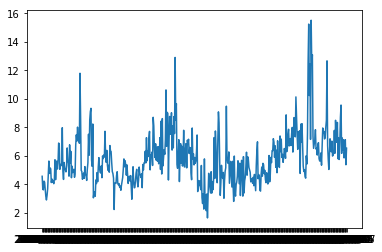

In [86]:
#figure(num=None, figsize=(32,24), dpi=80, facecolor='w', edgecolor='k')
plt.plot(l1,X3.iloc[3013][l1])

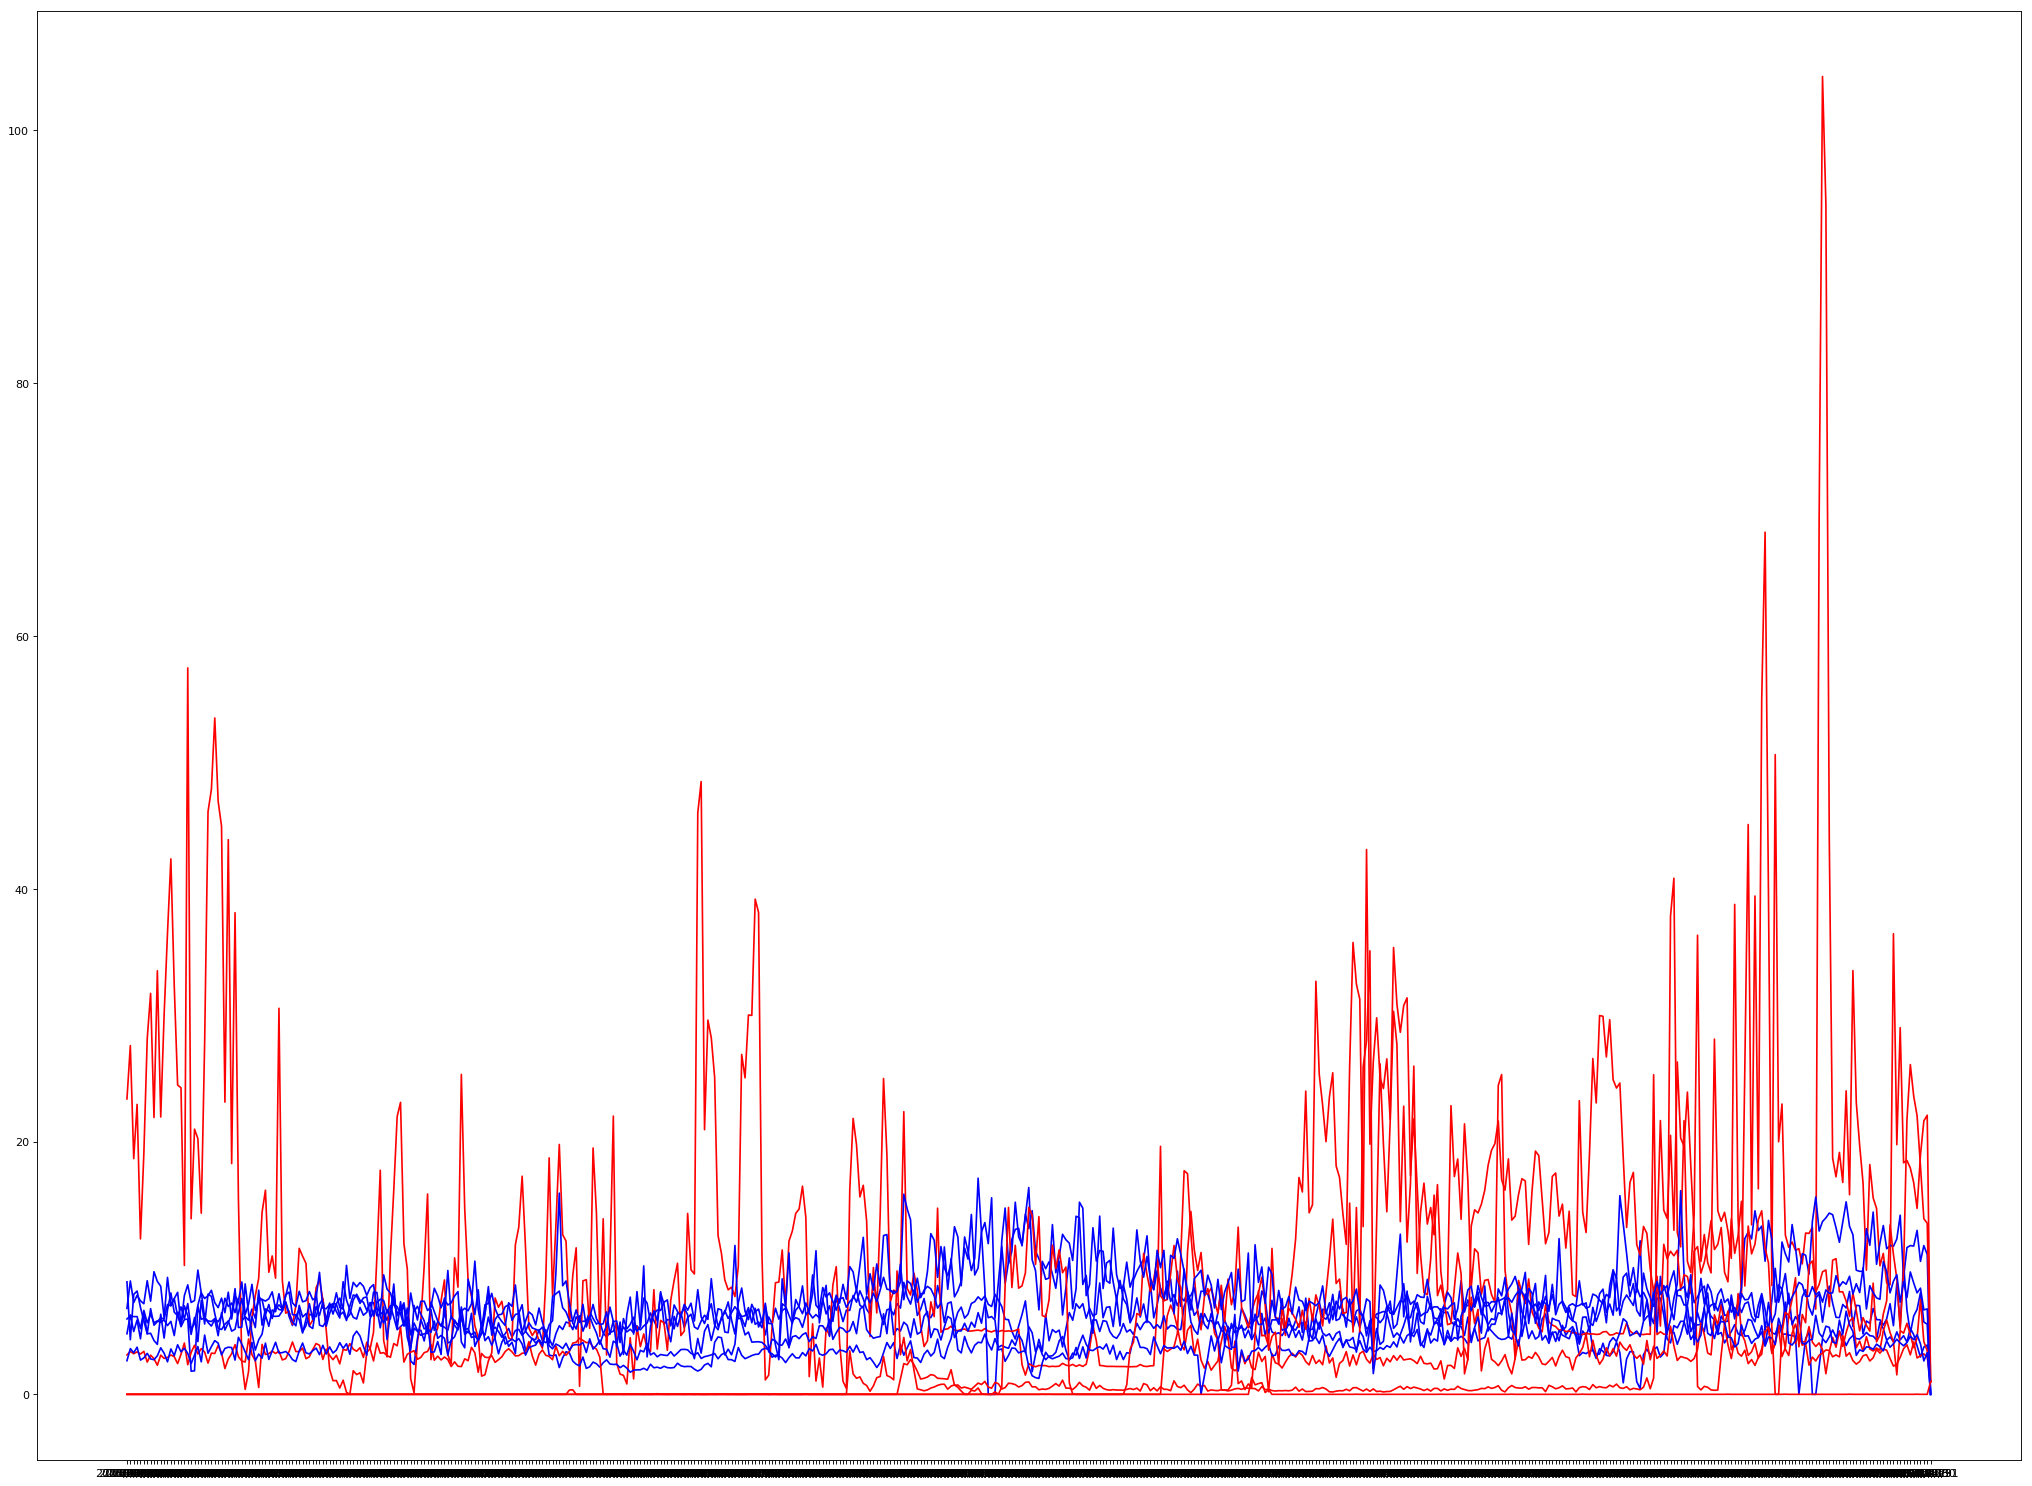

In [195]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(32,24), dpi=80, facecolor='w', edgecolor='k')
axes = plt.gca()
#axes.set_xlim([,])
#x1,x2,y1,y2 = plt.axis()
#plt.axis((x1,x2,0,50))
#axes.set_ylim([0,50])
for i in range(3000,3005):
    plt.plot(l1,X3.iloc[i][l1],c='b')
    plt.plot(l1,X3.iloc[i-2000][l1],c='r')
    #plt.plot(l1,)
    #plt.show()

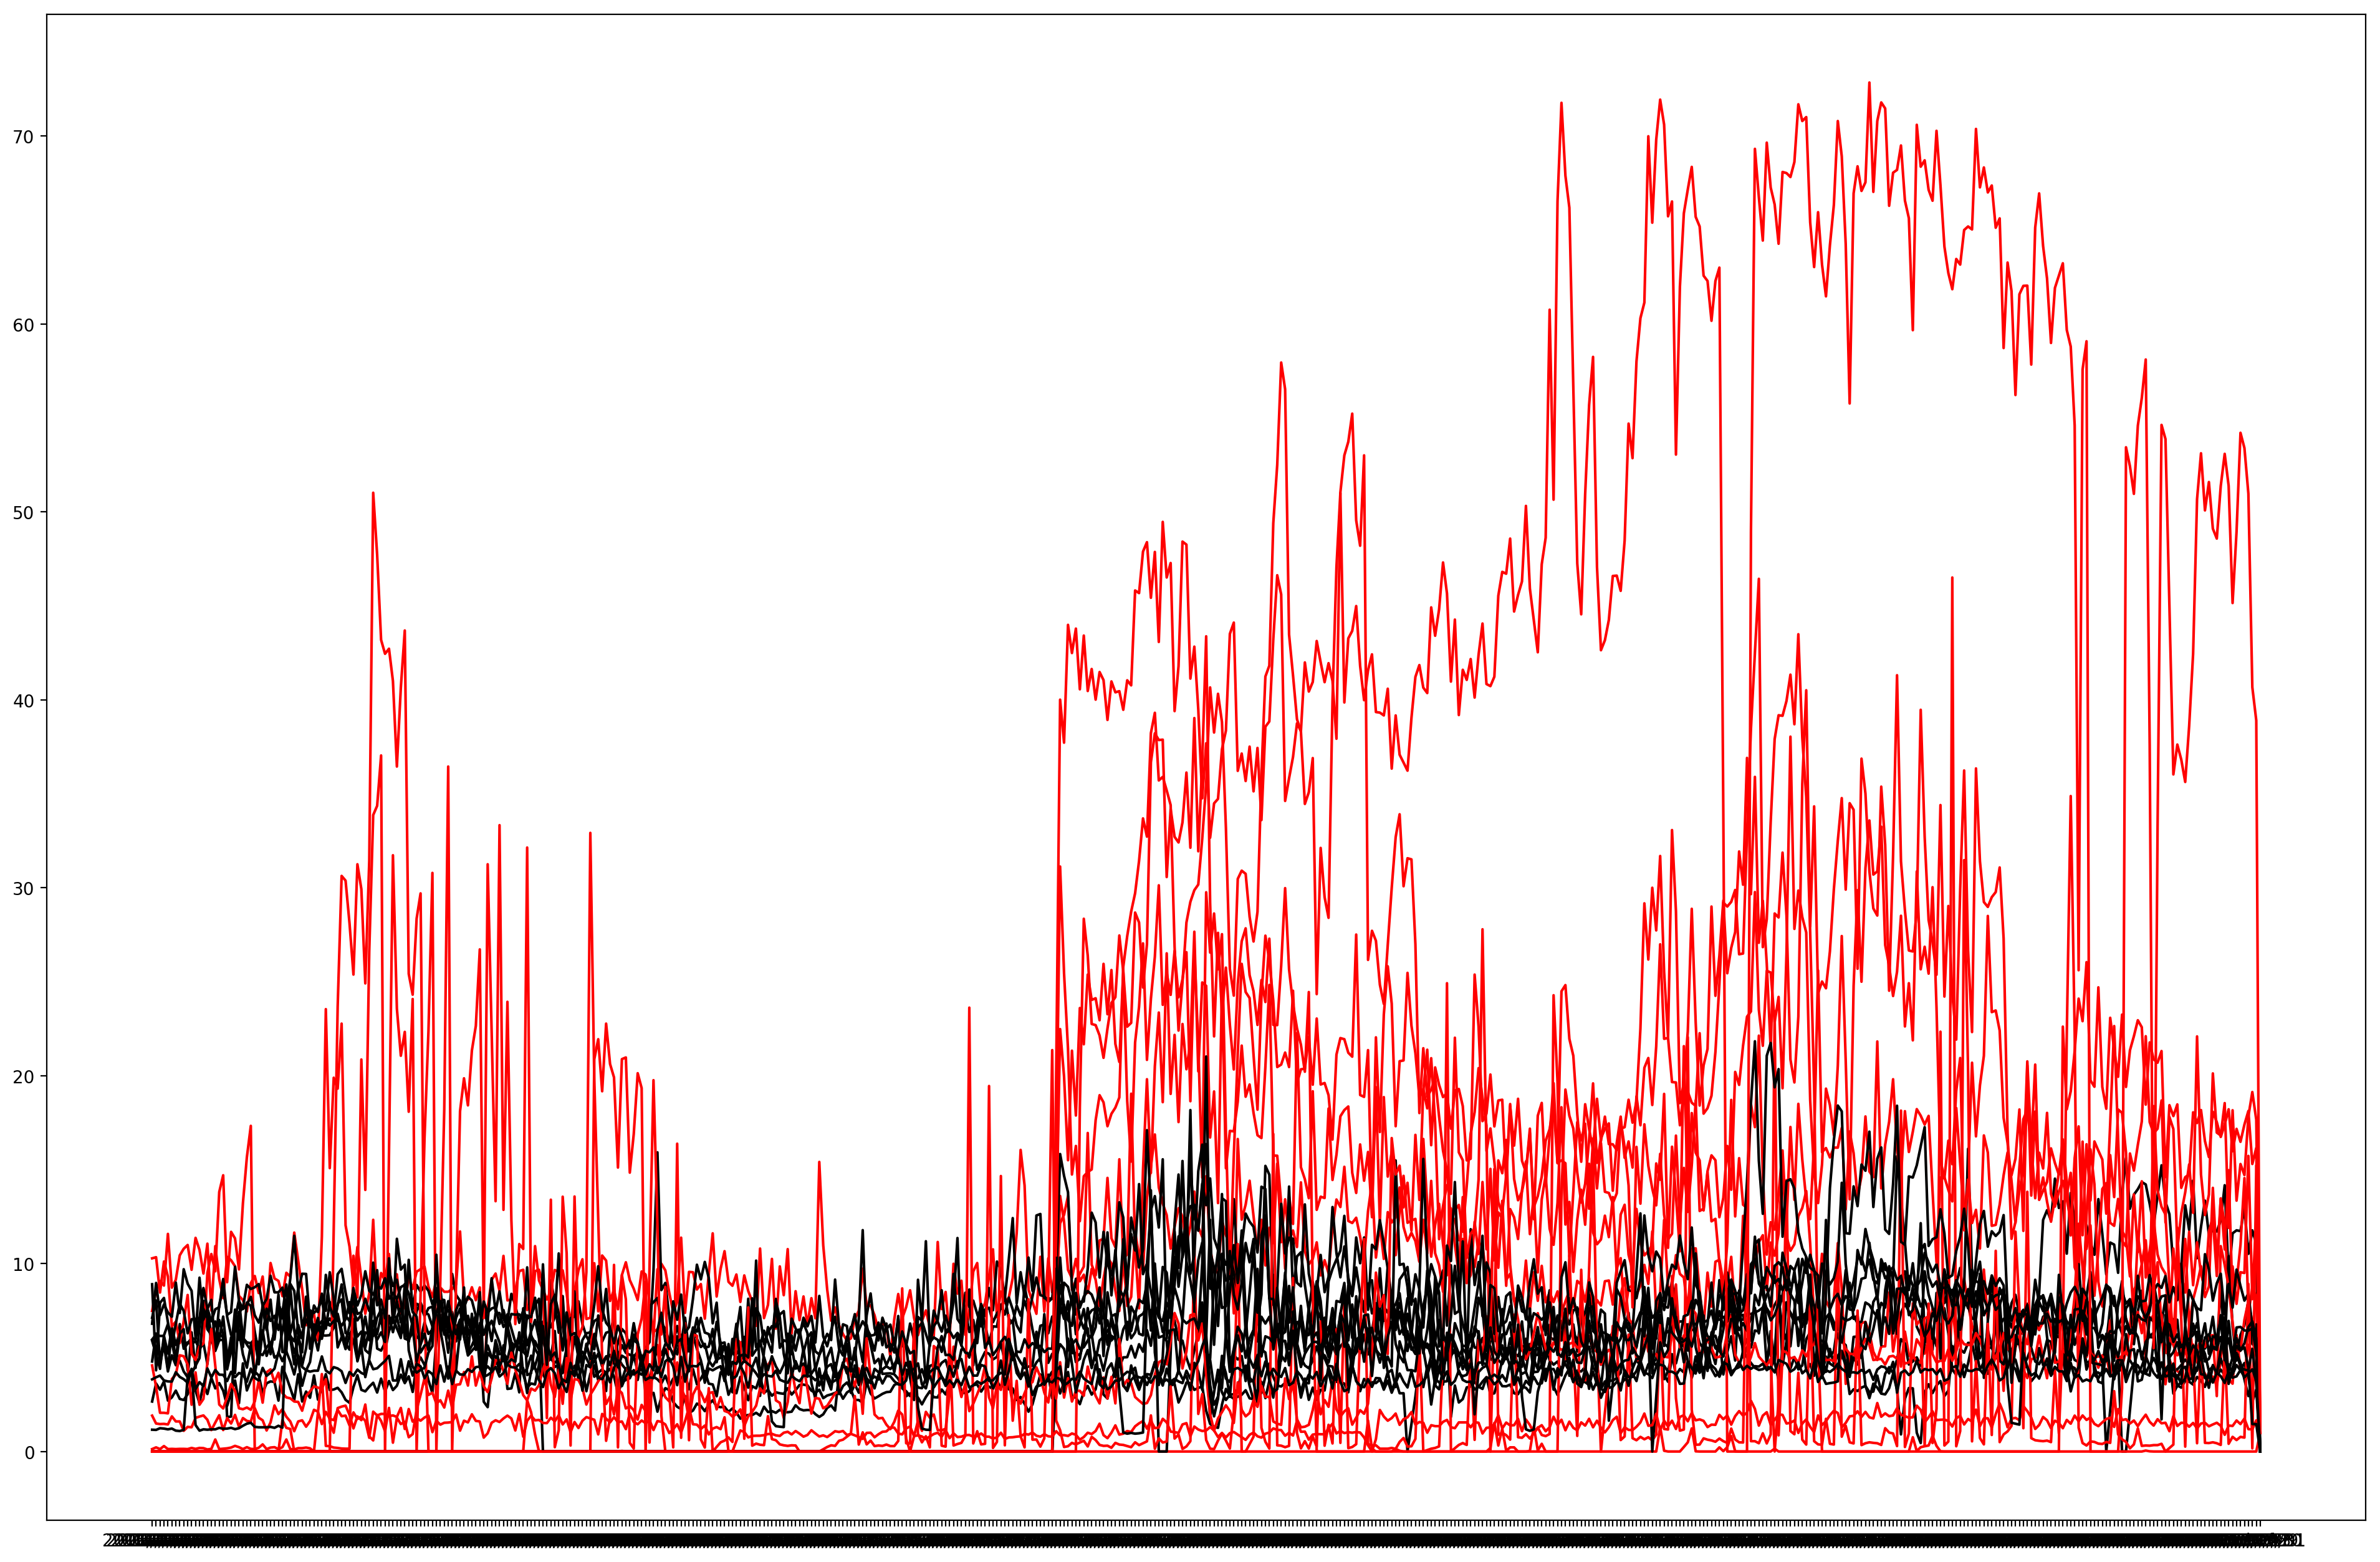

In [128]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(24,16), dpi=200, facecolor='w', edgecolor='k')
axes = plt.gca()
fig = plt.gcf()
#axes.set_xlim([,])
#x1,x2,y1,y2 = plt.axis()
#plt.axis((x1,x2,0,50))
#axes.set_ylim([0,50])
for i in range(2000,2010):
    plt.plot(l1,X3.iloc[i][l1],c='r')
    plt.plot(l1,X3.iloc[i+1000][l1],c='k')
    #plt.plot(l1,)
    #plt.show()
#fig.set_size_inches(18.5, 10.5)
fig.savefig('boththeft1.png', dpi=200)

In [89]:
Ecd=Ecd.tolist()

In [90]:
Ecd[2008]
#ecd less than 70 is 0 >100 is 1

115.78802250888405

In [91]:
## l3=[]
l4=[]
for i in range(len(l2)):
    if l2[i]<=70 and Y1[i]==0:
        l3.append(X1.iloc[i])
    elif l2[i]>=100 and Y1[i]==1:
        l4.append(X1.iloc[i])

In [92]:
#h=[[2,3],[4,5]]
#g=[3,4]
#t2=list(([np.array(i) for i in h] - np.array(g))**2)
#t2=list((np.array([2,3])-np.array([3,4])))

In [181]:
X_train,X_test,Y_train,Y_test=train_test_split(X3,Yf,test_size=0.20)

In [183]:
sm=SM(random_state=42)
#X_tr,Y_tr=sm.fit_sample(X_train,Y_train)
X_tr,Y_tr=sm.fit_sample(X_train,Y_train)

In [182]:
#statistics.stdev(l)
#X_trainpca.shape
#transformer = KernelPCA(n_components=50, kernel='linear')
#X_transformed =transformer.fit_transform(X_train)
X_train.shape

(4193, 535)

In [96]:
#l1=df1.isnull().sum(axis=1)
#l1=np.asarray(l1).tolist()

In [184]:
#model=RB()
#model.fit(X_trainpca,Y_train)
#model=MP(n_estimators=10)
model=ET()
model.fit(X_tr,Y_tr)

C:\Users\ANSHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [185]:
model.score(X_train,Y_train)

1.0

In [99]:
#df.head()
ltr=model.predict(X_tr)

In [100]:
#sm=SM(random_state=42)
#X_ts,Y_ts=sm.fit_sample(X_test,Y_test)

In [101]:
c=0
for i in Y_test:
    if i==1:
        c+=1
c

557

In [186]:
#l=model.predict(X_ts)
model.score(X_test,Y_test)
#model.score(X_ts,Y_ts)
#f1_score(Y_ts,l)

0.9971401334604385

In [187]:
l1=model.predict(X_test)
f1_score(Y_test,l1)

0.9971936389148738

In [104]:
Y_test=np.asarray(Y_test).tolist()

In [178]:
c=0
for i in range(len(l1)):
    if(Y_test[i])==1:
        c+=1
c

719

In [189]:
c=0
for i in range(len(l1)):
    if l1[i]!=Y_test[i] and Y_test[i]==1:
        c+=1
print(c)

3


In [107]:
#len(Y_test)
#89 right predicted 284 wrong

In [287]:
c=0
for i in Y_test:
    if i==1:
        c+=1
c

767

In [90]:
#X_tr.shape
#dfa["null"]
#dfb["null"].value_counts()

In [39]:
#plt.scatter(dfa["null"],dfb["null"])

In [28]:
#df1=df1.drop("null",axis=1)

In [145]:
#df1[df1["FLAG"]==1].describe()

In [91]:
#l=Y_test

In [ ]:
#Y_test----738 out of 8475 are 1.